# Spatial analyses

## Loading data

In [2]:
##Loading libraries

import scimap as sm
import scanpy as sc
import seaborn as sns; sns.set(color_codes=True)
import anndata as ad
import pandas as pd
import numpy as np
from sklearn.neighbors import BallTree
from joblib import Parallel, delayed
import scipy
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import multiprocessing as mp
import seaborn as sns
from bokeh.plotting import figure, output_file, show 
from bokeh.palettes import Category10, Category20, Category20b, Category20
import umap as um
import os

Running SCIMAP  2.3.5


c:\Users\jhona\miniconda3\envs\scimap\lib\site-packages\mpl_scatter_density\__init__.py:4: UserWarning:

pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.

c:\Users\jhona\miniconda3\envs\scimap\lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [3]:
# Version of scimap
print("scimap version:", sm.__version__)

scimap version: 2.3.5


In [ ]:
##Directories
#dir_in = "/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/08_Results/Datasets/06_RCN/csv/updated/"
#dir_out_data = "/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/08_Results/Datasets/06_RCN/csv/updated/"
#dir_out_plots = "/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/09_Plots_and_figures/Plots_2025/RCN_discovery/radius_spatial_count_leiden/"
#dir_out_calculations = "/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/08_Results/Datasets/06_RCN/neigh_graph_matrix/"

In [15]:
# Directories in Windows
dir_in = r"\\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\08_Results\Datasets\08_RCN\csv\updated\test_marval"
dir_out_data = r"\\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\08_Results\Datasets\08_RCN\csv\updated\test_marval"
dir_out_plots = r"\\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\09_Plots_and_figures\Plots_2025\RCN_discovery\radius_spatial_count_leiden\test_marval"
dir_out_calculations = r"\\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\08_Results\Datasets\08_RCN\neigh_graph_matrix\test_marval"

In [5]:
# Show files in directory
print("Files in input directory:", os.listdir(dir_in))
print("Files in output data directory:", os.listdir(dir_out_data))
print("Files in output plots directory:", os.listdir(dir_out_plots))
print("Files in output calculations directory:", os.listdir(dir_out_calculations))

Files in input directory: ['RCN.h5ad', 'RCN_updated.csv', 'scimap_RCN.h5ad']
Files in output data directory: ['RCN.h5ad', 'RCN_updated.csv', 'scimap_RCN.h5ad']
Files in output plots directory: ['spatialInteractionNetwork.pdf']
Files in output calculations directory: []


In [5]:
#Load data
adata = sc.read(r"\\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\08_Results\Datasets\08_RCN\csv\updated\test_marval\RCN.h5ad")
#adata= sc.read("/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/08_Results/Datasets/06_RCN/csv/updated/RCN.h5ad")
#adata = pd.read_csv("/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/08_Results/Datasets/05_metadata_annotation/csv/aggregated_data.csv")

In [13]:
# Show adata info
print(adata)  # Print the AnnData object summary

AnnData object with n_obs × n_vars = 12415074 × 30
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'Sample', 'Condition', 'Replicate', 'phenotype', 'FinalPhenotype', 'GlobalCellType', 'Batch', 'Group', 'Tumor type', 'Same patient', 'Tumor site', 'Tumor stage', 'Age at tumor', 'FA gene', 'Smoking', 'Gender', 'BMT', 'VPH status', 'Patient status', 'Desmoplastic grade', 'Desmoplastic category', 'tim3', 'pd_l1', 'pd_1', 'p_s6', 'ki67', 'gh2ax', 'epithelium', 'CellID', 'imageid'
    uns: 'all_markers'
    layers: 'log'


In [25]:
# Show first few rows of adata
print(adata.obs.head())

                 X_centroid    Y_centroid  Area  MajorAxisLength  \
FAHNSCC_11A_1  11185.516060   8365.693790   467        25.867368   
FAHNSCC_11A_2   7186.449627  11327.268657   536        28.405857   
FAHNSCC_11A_3   3499.581356   3682.459322   590        29.941527   
FAHNSCC_11A_4  10631.809035   7499.527721   487        27.899300   
FAHNSCC_11A_5  14293.819923   4602.793103   522        28.274016   

               MinorAxisLength  Eccentricity  Solidity    Extent  Orientation  \
FAHNSCC_11A_1        23.026569      0.455612  0.964876  0.778333    -0.764107   
FAHNSCC_11A_2        24.052832      0.531981  0.972777  0.797619    -0.343483   
FAHNSCC_11A_3        25.243419      0.537772  0.965630  0.786667     1.562485   
FAHNSCC_11A_4        22.451737      0.593625  0.964356  0.724702    -0.251315   
FAHNSCC_11A_5        23.590147      0.551250  0.970260  0.773333    -0.884296   

                    Sample  ... Desmoplastic category   tim3   pd_l1   pd_1  \
FAHNSCC_11A_1  FAHNSCC_11

In [9]:
# Export updated AnnData to CSV
sm.hl.scimap_to_csv(adata, output_dir=dir_out_data, file_name="RCN_updated", CellID='CellID', verbose=True, layer=None)

## Format data from csv to adata (if needed)

In [ ]:
# Format anndata for Squidpy (if needed)
df = pd.read_csv(dir_in)
# Delimit markers
marker_cols = df.columns[1:31]  # columnas 2 a 31
X = df[marker_cols].to_numpy()

# Metadata
meta_cols = df.columns[[0]]  # CellID
meta_cols = meta_cols.append(df.columns[33:])  # columnas 34 en adelante
obs = df[meta_cols]

# Create anndata
adata = ad(X=X, obs=obs)

#Set sample ID as categorical (needed)
for col in adata.obs.columns:
    adata.obs[col] = adata.obs[col].astype('category')

# Set spatial coordinates
adata.obsm["spatial"] = df.iloc[:, 31:33].to_numpy()

#ADDING METADATA BASED ON COLUMNS FROM XLSX
meta_df = pd.read_excel("/Volumes/Projects/t-CycIF/t-CycIF_human/Experiment/clinical_metadata.xlsx")
meta_df = meta_df.set_index("Sample")
for col in meta_df.columns:
    # Usamos map para asignar el valor correcto a cada célula
    adata.obs[col] = adata.obs['Sample'].map(meta_df[col])

#adata.write(dir_out_data + "aggregate_data_sp.h5ad")

In [11]:
#With scimap function
# Construct the path to the CSV file
import os
csv_file = os.path.join(dir_in, "RCN_updated.csv")
# Convert CSV to AnnData
adata = sm.pp.mcmicro_to_scimap(csv_file, remove_dna=True, remove_string_from_name=None, log=False, drop_markers=None,
                            random_sample=None, unique_CellId=True, CellId='CellID', split='X_centroid',
                            custom_imageid=None, min_cells=None, output_dir=None)

Loading RCN_updated.csv


c:\Users\jhona\miniconda3\envs\scimap\lib\site-packages\scimap\preprocessing\mcmicro_to_scimap.py:106: DtypeWarning:

Columns (51,53,54,56,57,60) have mixed types. Specify dtype option on import or set low_memory=False.



In [30]:
# Show available samples
print(adata.obs['epithelium'].unique())

['epithelium' 'Unknown']


In [ ]:
#Where does carcinoma come from?
sm.tl.foldchange(carcinoma, from_group = ["AGSCC_1","AGSCC_2", "VHNSCC_01","HNSCC_4"], 
                 to_group=['FAAGSCC_9', 'FAAGSCC_13', 'FAHNSCC_11A','FAHNSCC_11B', 'FAHNSCC_11C', 'FAHNSCC_14', 'FAHNSCC_15', 'FAHNSCC_6'], 
                 imageid='Sample', phenotype='phenotype', normalize=True, 
                 subset_phenotype=None, label='foldchange_FA', verbose=True)

sm.pl.foldchange(carcinoma, label='foldchange_FA', p_val=0.05, nonsig_color='grey', subset_xaxis=None, 
                 subset_yaxis=None, log=True, center=0, method='heatmap', parallel_coordinates_color=None, 
                 matplotlib_bbox_to_anchor=(1.04, 1), 
                 matplotlib_legend_loc='upper left', xticks_rotation=90, return_data=False, )

## Identifying recurrent colocalization

In [20]:
# Spatial interaction analysis
# Why choose knn, knn=30, permutation=100?
sm.tl.spatial_interaction(adata, x_coordinate='X_centroid', y_coordinate='Y_centroid',phenotype='phenotype', 
                          method = 'knn', knn=30, permutation=100, imageid='imageid', pval_method='zscore', 
                          verbose=True, label ='spatial_interaction')

Processing Image: ['FAHNSCC_11A']
Identifying the 30 nearest neighbours for every cell
Mapping phenotype to neighbors
Performing 100 permutations
Consolidating the permutation results
Processing Image: ['FAHNSCC_11B']
Identifying the 30 nearest neighbours for every cell
Mapping phenotype to neighbors
Performing 100 permutations
Consolidating the permutation results
Processing Image: ['FAHNSCC_11C']
Identifying the 30 nearest neighbours for every cell
Mapping phenotype to neighbors
Performing 100 permutations
Consolidating the permutation results
Processing Image: ['FAHNSCC_14']
Identifying the 30 nearest neighbours for every cell
Mapping phenotype to neighbors
Performing 100 permutations
Consolidating the permutation results
Processing Image: ['FAHNSCC_15']
Identifying the 30 nearest neighbours for every cell
Mapping phenotype to neighbors
Performing 100 permutations
Consolidating the permutation results
Processing Image: ['FAHNSCC_6']
Identifying the 30 nearest neighbours for every ce

AnnData object with n_obs × n_vars = 12415074 × 30
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'Sample', 'Condition', 'Replicate', 'phenotype', 'FinalPhenotype', 'GlobalCellType', 'Batch', 'Group', 'Tumor type', 'Same patient', 'Tumor site', 'Tumor stage', 'Age at tumor', 'FA gene', 'Smoking', 'Gender', 'BMT', 'VPH status', 'Patient status', 'Desmoplastic grade', 'Desmoplastic category', 'tim3', 'pd_l1', 'pd_1', 'p_s6', 'ki67', 'gh2ax', 'epithelium', 'CellID', 'imageid'
    uns: 'all_markers', 'spatial_interaction'
    layers: 'log'

c:\Users\jhona\miniconda3\envs\scimap\lib\site-packages\scipy\stats\_stats_py.py:9694: RuntimeWarning:

divide by zero encountered in log



Saved network plot to \\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\09_Plots_and_figures\Plots_2025\RCN_discovery\radius_spatial_count_leiden\test_marval\spatialInteractionNetwork.pdf


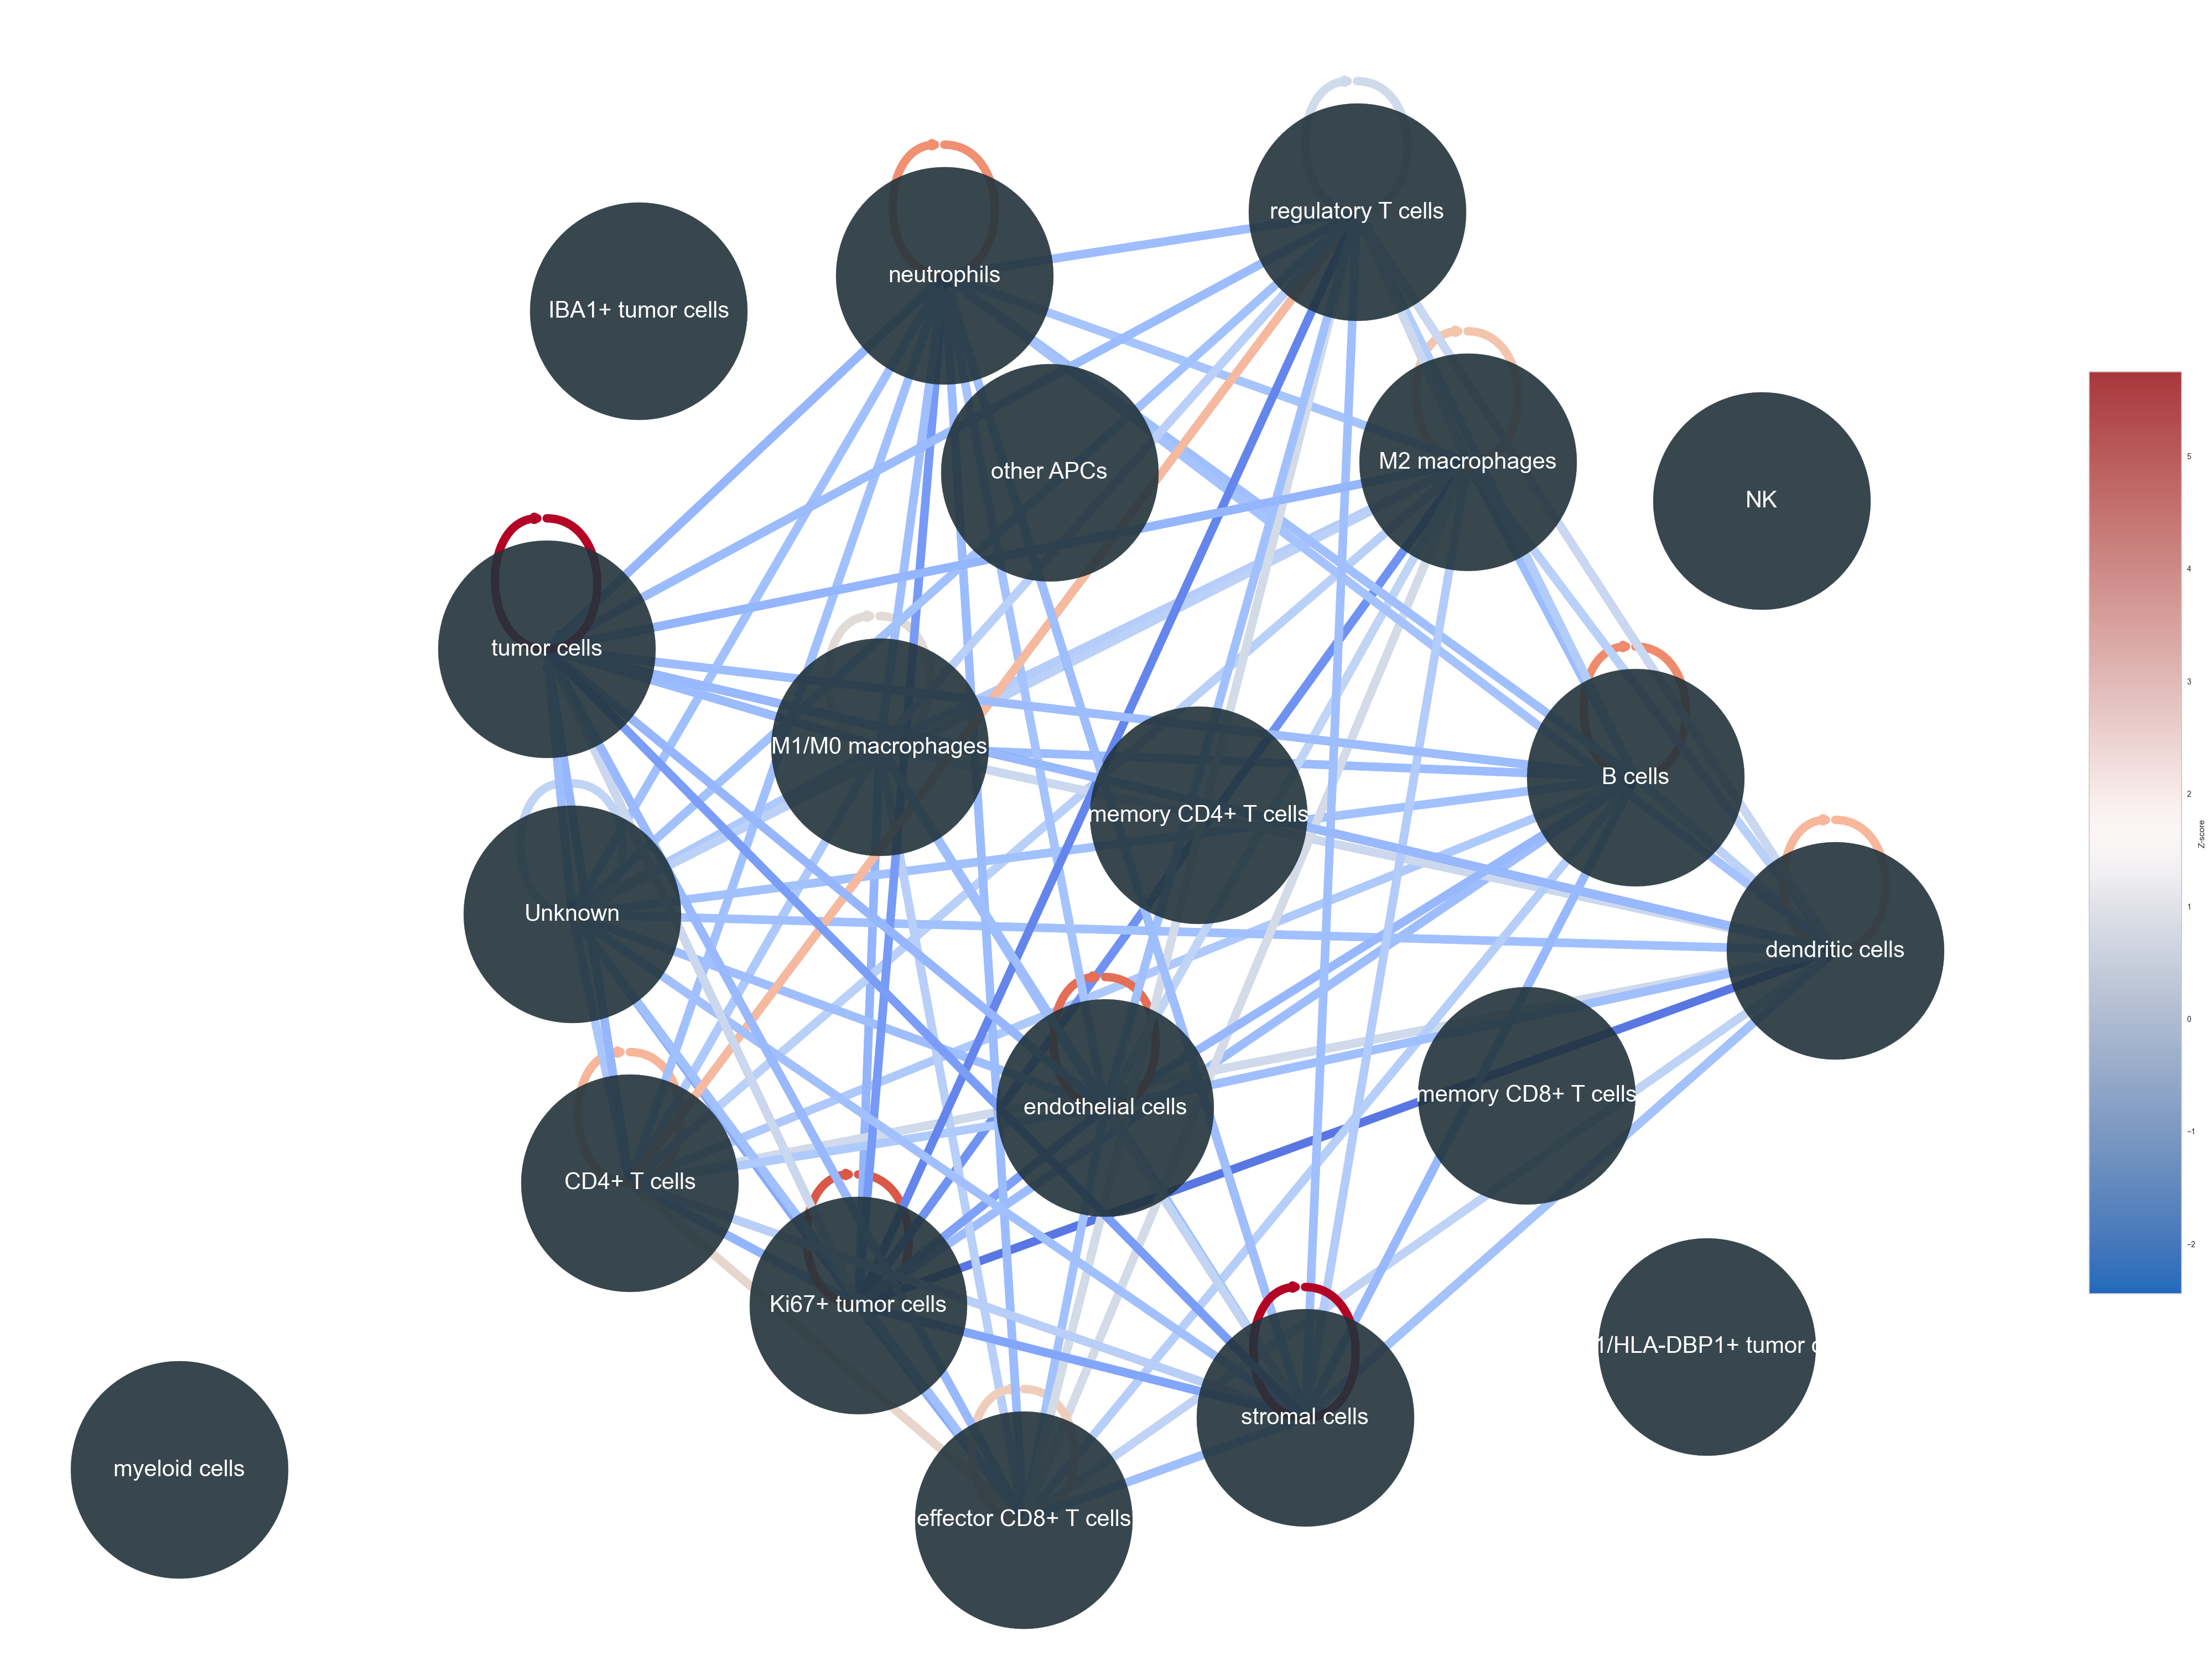

In [21]:
# Graph plot for spatial interaction cell types
sm.pl.spatialInteractionNetwork(adata, spatial_interaction='spatial_interaction', p_val=0.05, cmap='vlag', 
                          nodeColor='#22333b', nodeSize=80000, alpha=0.9, figsize=(40,30), fontSize=30, 
                          fontColor='white', subsetPhenotype=None, fileName='spatialInteractionNetwork.pdf', saveDir=dir_out_plots)

## Identifying local cell clusters (neighborhoods)

### Building neighborhood graph 
### Select method: radius (physical proximity) or knn (neareast neighbors)

In [22]:
#For radius
filtration = [45, 75, 150]
for radius in filtration:
    adata = sm.tl.spatial_count(adata, x_coordinate="X_centroid", y_coordinate='Y_centroid',
                            phenotype='FinalPhenotype', method='radius', radius=radius,
                            subset=None, label='spatial_count_' + str(radius))
    kclust = adata.uns['spatial_count_' + str(radius)]
    kclust.to_csv(dir_out_calculations + "spatial_count_" + str(radius) + ".csv")

Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours withi

In [23]:
#For knn
neighbors = [10, 20, 30]
for knn in neighbors:
    adata = sm.tl.spatial_count(adata, x_coordinate="X_centroid", y_coordinate='Y_centroid',
                            phenotype='FinalPhenotype', method='knn', knn=knn,
                            subset=None, label='spatial_count_knn_' + str(knn))
    kclust = adata.uns['spatial_count_knn_' + str(knn)]
    kclust.to_csv(dir_out_calculations + "spatial_count_knn_" + str(knn) + ".csv")

Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for ever

In [3]:
#Save adata as h5ad with scimap updates
adata.write(r"\\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\08_Results\Datasets\08_RCN\csv\updated\test_marval\scimap_RCN.h5ad")
#adata.write("/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/08_Results/Datasets/06_RCN/csv/updated/RCN.h5ad")

NameError: name 'adata' is not defined

### Cluster graph into RCNs

In [ ]:
adata = sm.tl.spatial_cluster(
                adata,
                resolution=1,
                nearest_neighbors=20,
                n_pcs= 10,
                method='leiden',
                df_name='spatial_count_45',
                random_state=42,
                label='spatial_count_cluster_45'
            )

In [ ]:
adata = sm.tl.spatial_cluster(
                adata,
                resolution=1,
                nearest_neighbors=20,
                method='knn',
                df_name='spatial_count_45',
                random_state=42,
                label='spatial_count_cluster_45'
            )

In [ ]:
# Define your parameter lists
filtration = [45, 75, 150]
resolution = [0.3,0.5,0.8]
nn = [10, 20, 30]

# Output folder for the plots
dir_out_plots = "/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/09_Plots_and_figures/Plots_2025/RCN_discovery/radius_spatial_count_leiden/"

# Make sure the folder exists
os.makedirs(dir_out_plots, exist_ok=True)

for radius in filtration:
    for res in resolution:
        for neighbor in nn:
            # Perform spatial clustering
            adata = sm.tl.spatial_cluster(
                adata,
                resolution=res,
                nearest_neighbors=neighbor,
                method='leiden',
                df_name='spatial_count_' + str(radius),
                random_state=42,
                label='spatial_count_cluster_' + str(radius)
            )

            # Create filename based on parameters
            plot_filename = f"stackedbar_radius{radius}_res{res}_nn{neighbor}.png"
            plot_path = os.path.join(dir_out_plots, plot_filename)

            # Generate and save the plot in high resolution
            sm.pl.stacked_barplot(
                adata,
                x_axis='RCN',
                y_axis='FinalPhenotype',
                save=plot_path,
                dpi=600  # high-quality output
            )

            print(f"Plot saved: {plot_path}")


In [ ]:
km = KMeans(random_state=42)
visualizer2 = KElbowVisualizer(km, k=(2,55), timings=False, metric='distortion', locate_elbow=False)
visualizer2.fit(adata.uns['spatial_count'].fillna(0))        # Fit the data to the visualizer
visualizer2.show()  

In [ ]:
sm.pl.stacked_barplot(adata, x_axis='RCN', y_axis='FinalPhenotype')

**Why these values? If it is based on criteria, can something more robust be done? We need tools to determine the number of idea clusters (if that exists) and the optimal number of neighbors to avoid over- and under-representation in the analyses.**

We need make a subset of the data for run tools no to take dessicions

In [4]:
#Load data")
adata = sc.read(r"\\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\08_Results\Datasets\08_RCN\csv\updated\test_marval\scimap_RCN.h5ad")
# Show adata info
print(adata)

AnnData object with n_obs × n_vars = 12415074 × 30
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'Sample', 'Condition', 'Replicate', 'phenotype', 'FinalPhenotype', 'GlobalCellType', 'Batch', 'Group', 'Tumor type', 'Same patient', 'Tumor site', 'Tumor stage', 'Age at tumor', 'FA gene', 'Smoking', 'Gender', 'BMT', 'VPH status', 'Patient status', 'Desmoplastic grade', 'Desmoplastic category', 'tim3', 'pd_l1', 'pd_1', 'p_s6', 'ki67', 'gh2ax', 'epithelium', 'CellID', 'imageid'
    uns: 'all_markers', 'spatial_count_150', 'spatial_count_45', 'spatial_count_75', 'spatial_count_knn_10', 'spatial_count_knn_20', 'spatial_count_knn_30', 'spatial_interaction'
    layers: 'log'


In [5]:
# Data subset for testing
np.random.seed(42)

sub_idx = []

for sample in adata.obs["Sample"].unique():
    idx = adata.obs.index[adata.obs["Sample"] == sample]
    
    # Si la muestra tiene menos de 10000 toma todas
    n = min(10000,len(idx))
    
    chosen = np.random.choice(idx, size=n, replace=False)
    sub_idx.extend(chosen)

adata_sub = adata[sub_idx, :].copy()


In [6]:
# Verification of subset dimensions
print("=" * 60)
print("VERIFICATION OF DATA SUBSET")
print("=" * 60)

# Original dimensions
print(f"\n Original adata dimensions:")
print(f"   Total cells: {adata.n_obs:,}")
print(f"   Total features: {adata.n_vars}")

# Subset dimensions
print(f"\n Subset adata_sub dimensions:")
print(f"   Total cells: {adata_sub.n_obs:,}")
print(f"   Total features: {adata_sub.n_vars}")

# Reduction percentage
reduction_pct = (1 - adata_sub.n_obs / adata.n_obs) * 100
print(f"\n Reduction: {reduction_pct:.1f}% (kept {100-reduction_pct:.1f}%)")

# Cells per sample in original data
print(f"\n Cells per sample in ORIGINAL data:")
sample_counts_orig = adata.obs["Sample"].value_counts().sort_index()
for sample, count in sample_counts_orig.items():
    print(f"   {sample}: {count:,}")

# Cells per sample in subset
print(f"\n Cells per sample in SUBSET:")
sample_counts_sub = adata_sub.obs["Sample"].value_counts().sort_index()
for sample, count in sample_counts_sub.items():
    print(f"   {sample}: {count:,}")

# Verify all samples are represented
print(f"\n All samples represented: {set(adata.obs['Sample'].unique()) == set(adata_sub.obs['Sample'].unique())}")

print("\n" + "=" * 60)

VERIFICATION OF DATA SUBSET

 Original adata dimensions:
   Total cells: 12,415,074
   Total features: 30

 Subset adata_sub dimensions:
   Total cells: 330,000
   Total features: 30

 Reduction: 97.3% (kept 2.7%)

 Cells per sample in ORIGINAL data:
   AGSCC_1: 834,121
   AGSCC_2: 531,027
   AGSCC_3: 1,048,575
   AGSCC_4: 79,696
   AGSCC_5: 98,801
   AGSCC_6: 168,614
   F1P1_PRIM: 146,777
   F6P1_b1: 237,251
   F8P1_PRIM: 611,264
   F9P2: 604,174
   F13P1: 290,051
   F23P1_PRIM: 179,319
   F29P1: 152,311
   F33P1: 932,072
   F43P1: 501,616
   F79P1: 212,629
   F81P1: 203,652
   F82P1: 103,983
   FAAGSCC_9: 380,875
   FAAGSCC_12: 603,209
   FAAGSCC_13: 329,163
   FAHNSCC_5: 1,133,827
   FAHNSCC_6: 171,765
   FAHNSCC_11A: 77,237
   FAHNSCC_11B: 57,363
   FAHNSCC_11C: 60,049
   FAHNSCC_14: 79,870
   FAHNSCC_15: 63,635
   FAHNSCC_16: 580,601
   HNSCC_4: 389,059
   HNSCC_5: 107,194
   HNSCC_7: 1,419,634
   VHNSCC_01: 25,660

 Cells per sample in SUBSET:
   AGSCC_1: 10,000
   AGSCC_2: 10,00

**Selection of PCs**

In [7]:
# Imports for clustering evaluation
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


✓ Extracted spatial_count_45 data
  Original matrix shape: (12415074, 17)
  Subset matrix shape: (330000, 17)
  Expected cells: 330000


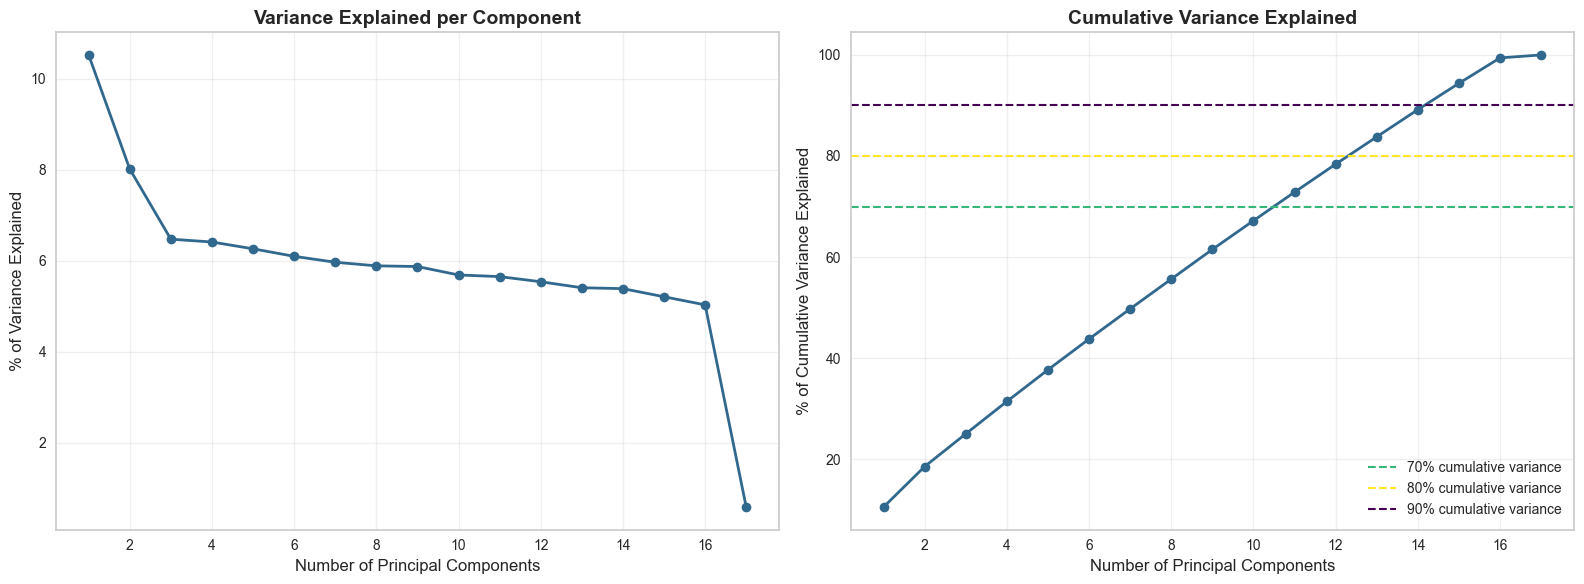

In [16]:
# Extract spatial count data for subset cells
# Create mapping from original adata to subset indices
indexer = {name: i for i, name in enumerate(adata.obs_names)}
pos = [indexer[name] for name in adata_sub.obs_names]

# Extract only the rows corresponding to adata_sub cells
X = adata.uns["spatial_count_45"].iloc[pos, :].copy()

print(f"✓ Extracted spatial_count_45 data")
print(f"  Original matrix shape: {adata.uns['spatial_count_45'].shape}")
print(f"  Subset matrix shape: {X.shape}")
print(f"  Expected cells: {adata_sub.n_obs}")

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_ * 100
cumulative_variance = np.cumsum(explained_variance)

# Create two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Individual variance explained per component
ax1.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', color='#31688e', linewidth=2)
ax1.set_xlabel("Number of Principal Components", fontsize=12)
ax1.set_ylabel("% of Variance Explained", fontsize=12)
ax1.set_title("Variance Explained per Component", fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Cumulative variance explained
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='#31688e', linewidth=2)
ax2.axhline(70, color='#35b779', linestyle='--', label="70% cumulative variance", linewidth=1.5)
ax2.axhline(80, color='#fde724', linestyle='--', label="80% cumulative variance", linewidth=1.5)
ax2.axhline(90, color='#440154', linestyle='--', label="90% cumulative variance", linewidth=1.5)
ax2.set_xlabel("Number of Principal Components", fontsize=12)
ax2.set_ylabel("% of Cumulative Variance Explained", fontsize=12)
ax2.set_title("Cumulative Variance Explained", fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10)

plt.tight_layout()
plt.show()

In [9]:
# Variance table
df_variance = pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(explained_variance))],
    "Varianza (%)": explained_variance,
    "Varianza acumulada (%)": cumulative_variance
})

display(df_variance.head(20))

,PC,Varianza (%),Varianza acumulada (%)
0,PC1,10.522828,10.522828
1,PC2,8.014626,18.537454
2,PC3,6.473564,25.011018
3,PC4,6.411311,31.422329
4,PC5,6.261928,37.684257
5,PC6,6.096743,43.781000
6,PC7,5.966470,49.747470
7,PC8,5.887770,55.635240
8,PC9,5.872311,61.507551
9,PC10,5.686946,67.194497


In [10]:
# Alternative criteria for selecting number of PCs

print("=" * 70)
print("ALTERNATIVE CRITERIA FOR PC SELECTION")
print("=" * 70)

# Criterion 1: Cumulative variance thresholds
thresholds = [70, 75, 80, 85, 90, 95]
print("\n Criterion 1: Cumulative variance thresholds")
for thresh in thresholds:
    n_pcs = np.where(cumulative_variance >= thresh)[0][0] + 1
    print(f"   {thresh}% variance → Use {n_pcs} PCs")

# Criterion 2: Kaiser rule (eigenvalue > average)
# Count how many PCs have explained variance greater than the average variance.
avg_variance = 100 / len(explained_variance)
kaiser_pcs = np.sum(explained_variance > avg_variance)
print(f"\n Criterion 2: Kaiser rule (variance > {avg_variance:.2f}%)")
print(f"   Use {kaiser_pcs} PCs")

# Criterion 3: Look for biggest drop in variance
variance_diff = np.diff(explained_variance)
biggest_drop_idx = np.argmin(variance_diff) + 1
print(f"\n Criterion 3: Biggest drop in variance")
print(f"   Use {biggest_drop_idx} PCs (biggest drop after PC{biggest_drop_idx})")
#print("\n" + "=" * 70)

# Recommendation
#print("\n" + "=" * 70)
#print("RECOMMENDED APPROACH:")
#print("Given the distributed variance, consider using:")
#print(f"   • Conservative: {np.where(cumulative_variance >= 80)[0][0] + 1} PCs (80% variance)")
#print(f"   • Moderate: {np.where(cumulative_variance >= 85)[0][0] + 1} PCs (85% variance)")
#print(f"   • Or test sensitivity with multiple values: [5, 10, 15]")
#print("=" * 70)

ALTERNATIVE CRITERIA FOR PC SELECTION

 Criterion 1: Cumulative variance thresholds
   70% variance → Use 11 PCs
   75% variance → Use 12 PCs
   80% variance → Use 13 PCs
   85% variance → Use 14 PCs
   90% variance → Use 15 PCs
   95% variance → Use 16 PCs

 Criterion 2: Kaiser rule (variance > 5.88%)
   Use 8 PCs

 Criterion 3: Biggest drop in variance
   Use 16 PCs (biggest drop after PC16)


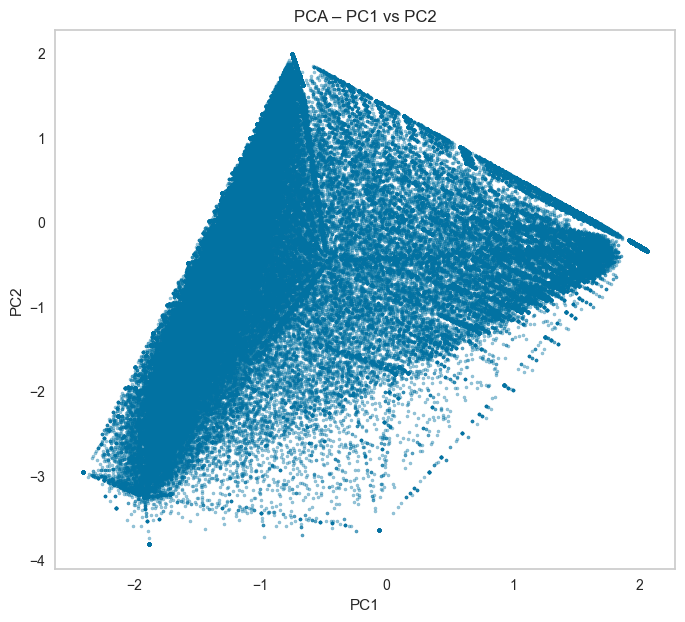

In [11]:
# Plot PCA
pca_df = pd.DataFrame(
    X_pca[:, :2],
    columns=['PC1', 'PC2'],
    index=X.index
)

plt.figure(figsize=(8, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], s=5, alpha=0.4)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA – PC1 vs PC2")
plt.grid()
plt.show()

In [12]:
# Loadings matrix
loadings = pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)

print("\nPCA Loadings Matrix:")
display(loadings)


PCA Loadings Matrix:


,B cells,CD4+ T cells,Ki67+ tumor cells,M1/M0 macrophages,M2 macrophages,NK,Other,dendritic cells,effector CD8+ T cells,endothelial cells,neutrophils,other APCs,regulatory T cells,stromal cells,tumor cells,IBA1+ tumor cells,IBA1/HLA-DBP1+ tumor cells
PC1,-0.170364,-0.265075,0.466401,-0.093657,-0.191621,-0.082044,-0.041141,-0.155964,-0.241000,-0.178349,-0.087926,-0.081119,-0.277998,-0.308890,0.572259,-0.010518,0.021333
PC2,-0.268446,-0.163492,-0.120004,-0.158914,-0.011282,-0.155653,0.016095,-0.272711,-0.384674,0.304033,-0.078160,-0.106891,-0.329974,0.599654,-0.116750,-0.150031,-0.003975
PC3,-0.026459,-0.011542,0.034769,-0.004938,-0.221393,-0.319584,0.101729,0.450730,-0.267785,-0.181020,0.271535,0.556860,0.009355,0.069962,-0.039847,-0.347701,-0.132326
PC4,0.402220,0.451438,0.024529,-0.409220,-0.378763,-0.224089,0.024334,-0.169155,0.014520,-0.214859,-0.211448,-0.236318,0.153398,0.158715,0.072583,-0.177572,-0.104997
PC5,0.206556,0.030853,-0.073057,-0.343963,-0.042823,-0.176240,-0.251845,-0.141713,-0.019134,0.538978,0.533873,0.022330,-0.085862,-0.362473,-0.008479,0.030489,-0.013768
PC6,-0.045161,-0.143287,-0.139748,-0.323161,-0.186668,0.216551,0.084843,-0.113460,0.128271,-0.408981,0.415406,0.141455,-0.108464,0.276246,0.043677,0.531084,-0.057714
PC7,0.059196,0.002074,-0.044748,-0.006443,-0.197139,0.098564,-0.066605,0.005065,-0.059124,-0.107235,0.098037,0.000475,-0.016644,0.013938,-0.082964,-0.154532,0.941045
PC8,-0.104085,0.246272,-0.024462,0.133654,0.542005,-0.302102,-0.140116,-0.229113,-0.230006,-0.431885,0.383626,-0.223566,0.091737,0.000585,0.028668,-0.078615,0.029972
PC9,0.174938,-0.088220,-0.004695,0.003265,0.116145,-0.093466,0.918865,-0.141580,0.014336,0.066910,0.141358,-0.103518,-0.083190,-0.149173,-0.022368,-0.071180,0.069836
PC10,-0.020146,0.059139,0.072887,-0.475774,0.387940,0.538785,0.006108,-0.153063,-0.015083,-0.077736,-0.079106,0.316293,-0.013666,-0.064722,0.004303,-0.425851,-0.043120


In [13]:
# Extract top positive and negative loadings for each PC
pc_top_loadings = []

for pc in loadings.index:
    pc_loadings = loadings.loc[pc].sort_values(ascending=False)
    
    # Get top positive and negative
    top_positive = pc_loadings.index[0]
    top_positive_value = pc_loadings.values[0]
    
    top_negative = pc_loadings.index[-1]
    top_negative_value = pc_loadings.values[-1]
    
    pc_top_loadings.append({
        'PC': pc,
        'Top Positive Feature': top_positive,
        'Positive Loading': round(top_positive_value, 4),
        'Top Negative Feature': top_negative,
        'Negative Loading': round(top_negative_value, 4)
    })

# Create DataFrame
df_top_loadings = pd.DataFrame(pc_top_loadings)

print("Top Positive and Negative Loadings per Principal Component:")
display(df_top_loadings)

Top Positive and Negative Loadings per Principal Component:


,PC,Top Positive Feature,Positive Loading,Top Negative Feature,Negative Loading
0,PC1,tumor cells,0.5723,stromal cells,-0.3089
1,PC2,stromal cells,0.5997,effector CD8+ T cells,-0.3847
2,PC3,other APCs,0.5569,IBA1+ tumor cells,-0.3477
3,PC4,CD4+ T cells,0.4514,M1/M0 macrophages,-0.4092
4,PC5,endothelial cells,0.5390,stromal cells,-0.3625
5,PC6,IBA1+ tumor cells,0.5311,endothelial cells,-0.4090
6,PC7,IBA1/HLA-DBP1+ tumor cells,0.9410,M2 macrophages,-0.1971
7,PC8,M2 macrophages,0.5420,endothelial cells,-0.4319
8,PC9,Other,0.9189,stromal cells,-0.1492
9,PC10,NK,0.5388,M1/M0 macrophages,-0.4758


**Leiden resolution**

Using 8 principal components for clustering


c:\Users\jhona\miniconda3\envs\scimap\lib\site-packages\scipy\sparse\_index.py:145: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.




TESTING LEIDEN CLUSTERING WITH DIFFERENT RESOLUTIONS
Resolution 0.2: 899 clusters | Silhouette: 0.326 | CH: 921.5 | DB: 1.146
Resolution 0.4: 866 clusters | Silhouette: 0.371 | CH: 1490.8 | DB: 1.124
Resolution 0.6: 927 clusters | Silhouette: 0.376 | CH: 1648.9 | DB: 1.106
Resolution 0.8: 930 clusters | Silhouette: 0.400 | CH: 1835.6 | DB: 1.141
Resolution 1.0: 962 clusters | Silhouette: 0.396 | CH: 1853.5 | DB: 1.135
Resolution 1.2: 983 clusters | Silhouette: 0.418 | CH: 2062.4 | DB: 1.106
Resolution 1.4: 999 clusters | Silhouette: 0.403 | CH: 2054.7 | DB: 1.115
Resolution 1.6: 1026 clusters | Silhouette: 0.405 | CH: 1977.2 | DB: 1.124
Resolution 1.8: 1025 clusters | Silhouette: 0.423 | CH: 2107.0 | DB: 1.161
Resolution 2.0: 1072 clusters | Silhouette: 0.259 | CH: 2081.5 | DB: 1.123
Resolution 2.2: 1068 clusters | Silhouette: 0.270 | CH: 2251.8 | DB: 1.156
Resolution 2.4: 1113 clusters | Silhouette: 0.255 | CH: 2097.4 | DB: 1.186
Resolution 2.6: 1133 clusters | Silhouette: 0.272 | CH

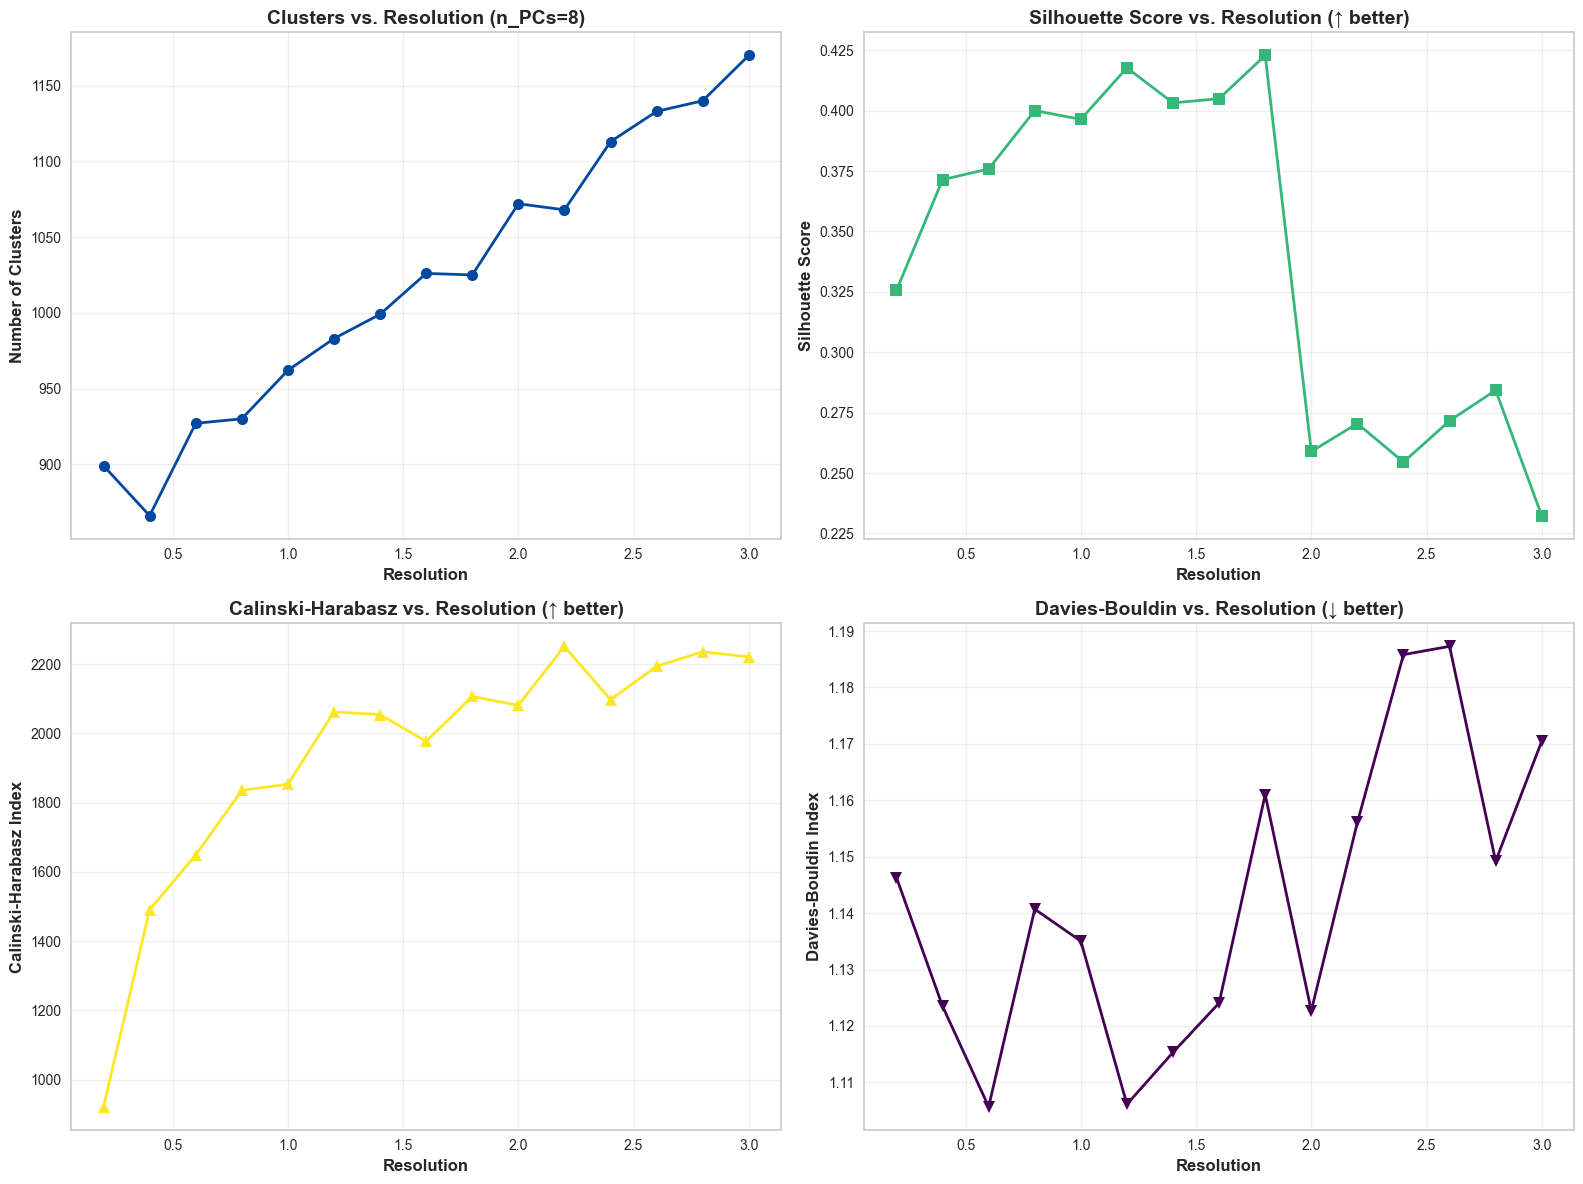


Plots saved to: \\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\09_Plots_and_figures\Plots_2025\RCN_discovery\radius_spatial_count_leiden\test_marval\leiden_resolution_analysis_pcs8.png

RECOMMENDED RESOLUTIONS

 Best Silhouette Score:
   Resolution: 1.8
   Clusters: 1025
   Score: 0.423

 Best Calinski-Harabasz:
   Resolution: 2.2
   Clusters: 1068
   Score: 2251.8

 Best Davies-Bouldin:
   Resolution: 0.6
   Clusters: 927

 BEST OVERALL (Composite Score):
   Resolution: 1.2
   Clusters: 983
   Composite: 0.720
   Silhouette: 0.418
   CH: 2062.4
   DB: 1.106

Leiden Clustering Resolution Summary:


,Resolution,Number_of_Clusters,Silhouette_Score,Calinski_Harabasz,Davies_Bouldin,Composite_Score
0,0.2,899,0.325579,921.490228,1.146309,0.529757
1,0.4,866,0.371423,1490.753862,1.123507,0.624866
2,0.6,927,0.375855,1648.863043,1.105697,0.651510
3,0.8,930,0.400013,1835.643726,1.140710,0.678271
4,1.0,962,0.396384,1853.515474,1.135042,0.681107
5,1.2,983,0.417694,2062.377683,1.106127,0.719635
6,1.4,999,0.403191,2054.677953,1.115326,0.714787
7,1.6,1026,0.404950,1977.163143,1.124081,0.702377
8,1.8,1025,0.422864,2106.979617,1.161021,0.719394
9,2.0,1072,0.258929,2081.495647,1.122699,0.693678


In [21]:
# Parameter for number of PCs to use
n_pcs_to_use = 8  # You can modify this value based on the variance analysis above

print(f"Using {n_pcs_to_use} principal components for clustering")

# Extract the selected number of PCs
X_pca_subset = X_pca[:, :n_pcs_to_use] if 'X_pca' in locals() else pca.transform(X_scaled)[:, :n_pcs_to_use]

# Test different resolution values for Leiden clustering
resolutions = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0]

# Create a temporary AnnData object for clustering analysis
adata_temp = sc.AnnData(X=X_pca_subset)
adata_temp.obs_names = X.index

# Compute neighbors graph
sc.pp.neighbors(adata_temp, n_neighbors=20, n_pcs=n_pcs_to_use)

# Store results
num_clusters = []
silhouette_scores = []
calinski_scores = []
davies_bouldin_scores = []

print("\n" + "=" * 70)
print("TESTING LEIDEN CLUSTERING WITH DIFFERENT RESOLUTIONS")
print("=" * 70)

for res in resolutions:
    # Run Leiden clustering
    sc.tl.leiden(adata_temp, resolution=res, key_added=f'leiden_{res}', random_state=42)
    
    # Count number of clusters
    n_clusters = len(adata_temp.obs[f'leiden_{res}'].unique())
    num_clusters.append(n_clusters)
    
    # Calculate quality metrics
    if n_clusters > 1 and n_clusters < len(X_pca_subset):
        labels = adata_temp.obs[f'leiden_{res}'].astype(int).values
        
        # Silhouette Score (higher is better, range: -1 to 1)
        sil_score = silhouette_score(X_pca_subset, labels, metric='euclidean', sample_size=10000)
        silhouette_scores.append(sil_score)
        
        # Calinski-Harabasz Index (higher is better, no upper bound)
        ch_score = calinski_harabasz_score(X_pca_subset, labels)
        calinski_scores.append(ch_score)
        
        # Davies-Bouldin Index (lower is better, >= 0)
        db_score = davies_bouldin_score(X_pca_subset, labels)
        davies_bouldin_scores.append(db_score)
        
        print(f"Resolution {res}: {n_clusters} clusters | Silhouette: {sil_score:.3f} | CH: {ch_score:.1f} | DB: {db_score:.3f}")
    else:
        silhouette_scores.append(0)
        calinski_scores.append(0)
        davies_bouldin_scores.append(np.inf)
        print(f"Resolution {res}: {n_clusters} clusters | Not enough clusters for metrics")

print("=" * 70)

# Plot results
plt.rcParams['font.family'] = 'Arial'
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Subplot 1: Number of clusters vs Resolution
axes[0, 0].plot(resolutions, num_clusters, marker='o', color='#00499F', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Resolution', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Number of Clusters', fontsize=12, fontweight='bold')
axes[0, 0].set_title(f'Clusters vs. Resolution (n_PCs={n_pcs_to_use})', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Subplot 2: Silhouette Score (higher is better)
axes[0, 1].plot(resolutions, silhouette_scores, marker='s', color='#35b779', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Resolution', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Silhouette Score vs. Resolution (↑ better)', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Subplot 3: Calinski-Harabasz Index (higher is better)
axes[1, 0].plot(resolutions, calinski_scores, marker='^', color='#fde724', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Resolution', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Calinski-Harabasz Index', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Calinski-Harabasz vs. Resolution (↑ better)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Subplot 4: Davies-Bouldin Index (lower is better)
# Filter out infinite values for plotting
db_plot = [db if db != np.inf else np.nan for db in davies_bouldin_scores]
axes[1, 1].plot(resolutions, db_plot, marker='v', color='#440154', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Resolution', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Davies-Bouldin Index', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Davies-Bouldin vs. Resolution (↓ better)', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()

# Save plot
output_plot = os.path.join(dir_out_plots, f"leiden_resolution_analysis_pcs{n_pcs_to_use}.png")
#plt.savefig(output_plot, dpi=600, bbox_inches='tight')
#plt.savefig(output_plot.replace('.png', '.pdf'), bbox_inches='tight')
plt.show()

print(f"\nPlots saved to: {output_plot}")

# Normalize metrics for composite scoring (0-1 scale, higher is better)
# Silhouette: already in [-1, 1], shift to [0, 1]
norm_sil = (np.array(silhouette_scores) + 1) / 2

# Calinski-Harabasz: normalize to [0, 1]
ch_valid = [ch for ch in calinski_scores if ch > 0]
if len(ch_valid) > 0:
    norm_ch = np.array(calinski_scores) / max(ch_valid)
else:
    norm_ch = np.zeros(len(calinski_scores))

# Davies-Bouldin: invert and normalize (lower DB is better)
db_valid = [db for db in davies_bouldin_scores if db != np.inf and db > 0]
if len(db_valid) > 0:
    norm_db = 1 - (np.array([min(db, max(db_valid)*2) if db != np.inf else max(db_valid)*2 
                              for db in davies_bouldin_scores]) / (max(db_valid)*2))
else:
    norm_db = np.zeros(len(davies_bouldin_scores))

# Composite score (average of normalized metrics)
composite_score = (norm_sil + norm_ch + norm_db) / 3
#summary_df['Composite_Score'] = composite_score

# Create summary DataFrame
summary_df = pd.DataFrame({
    'Resolution': resolutions,
    'Number_of_Clusters': num_clusters,
    'Silhouette_Score': silhouette_scores,
    'Calinski_Harabasz': calinski_scores,
    'Davies_Bouldin': davies_bouldin_scores,
    'Composite_Score': composite_score
})

# Find optimal resolutions for each metric
print("\n" + "=" * 70)
print("RECOMMENDED RESOLUTIONS")
print("=" * 70)

# Best Silhouette
best_sil_idx = summary_df['Silhouette_Score'].idxmax()
print(f"\n Best Silhouette Score:")
print(f"   Resolution: {summary_df.loc[best_sil_idx, 'Resolution']}")
print(f"   Clusters: {int(summary_df.loc[best_sil_idx, 'Number_of_Clusters'])}")
print(f"   Score: {summary_df.loc[best_sil_idx, 'Silhouette_Score']:.3f}")

# Best Calinski-Harabasz
best_ch_idx = summary_df['Calinski_Harabasz'].idxmax()
print(f"\n Best Calinski-Harabasz:")
print(f"   Resolution: {summary_df.loc[best_ch_idx, 'Resolution']}")
print(f"   Clusters: {int(summary_df.loc[best_ch_idx, 'Number_of_Clusters'])}")
print(f"   Score: {summary_df.loc[best_ch_idx, 'Calinski_Harabasz']:.1f}")

# Best Davies-Bouldin (minimum)
valid_db = summary_df[summary_df['Davies_Bouldin'] != np.inf]
if len(valid_db) > 0:
    best_db_idx = valid_db['Davies_Bouldin'].idxmin()
    print(f"\n Best Davies-Bouldin:")
    print(f"   Resolution: {summary_df.loc[best_db_idx, 'Resolution']}")
    print(f"   Clusters: {int(summary_df.loc[best_db_idx, 'Number_of_Clusters'])}")

# Best Composite
best_comp_idx = summary_df['Composite_Score'].idxmax()
print(f"\n BEST OVERALL (Composite Score):")
print(f"   Resolution: {summary_df.loc[best_comp_idx, 'Resolution']}")
print(f"   Clusters: {int(summary_df.loc[best_comp_idx, 'Number_of_Clusters'])}")
print(f"   Composite: {summary_df.loc[best_comp_idx, 'Composite_Score']:.3f}")
print(f"   Silhouette: {summary_df.loc[best_comp_idx, 'Silhouette_Score']:.3f}")
print(f"   CH: {summary_df.loc[best_comp_idx, 'Calinski_Harabasz']:.1f}")
print(f"   DB: {summary_df.loc[best_comp_idx, 'Davies_Bouldin']:.3f}")

print("=" * 70)

# Add a table with resolution results, including number of clusters and metrics and scores  
print("\nLeiden Clustering Resolution Summary:")
display(summary_df)

### **K-means**

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np
import pandas as pd
import os


TESTING K-MEANS WITH DIFFERENT K VALUES
K= 2: Inertia=2604944.2 | Silhouette=0.254 | CH=65392.0 | DB=1.478
K= 3: Inertia=2278214.8 | Silhouette=0.293 | CH=61048.2 | DB=1.891
K= 4: Inertia=2032640.8 | Silhouette=0.338 | CH=58905.3 | DB=1.601
K= 5: Inertia=1737201.7 | Silhouette=0.363 | CH=65722.4 | DB=1.335
K= 6: Inertia=1494217.4 | Silhouette=0.392 | CH=71860.3 | DB=1.258
K= 7: Inertia=1294365.1 | Silhouette=0.424 | CH=77621.5 | DB=1.134
K= 8: Inertia=1110581.9 | Silhouette=0.431 | CH=85343.6 | DB=1.067
K= 9: Inertia=953222.2 | Silhouette=0.456 | CH=93812.4 | DB=0.943
K=10: Inertia=882087.1 | Silhouette=0.456 | CH=93070.2 | DB=0.969
K=11: Inertia=818921.5 | Silhouette=0.424 | CH=92769.2 | DB=1.002
K=12: Inertia=775890.0 | Silhouette=0.425 | CH=90676.3 | DB=1.033
K=13: Inertia=741072.7 | Silhouette=0.417 | CH=88317.1 | DB=1.087
K=14: Inertia=710968.9 | Silhouette=0.423 | CH=86049.7 | DB=1.096
K=15: Inertia=686928.5 | Silhouette=0.420 | CH=83524.6 | DB=1.122
K=16: Inertia=653336.9 | Silh

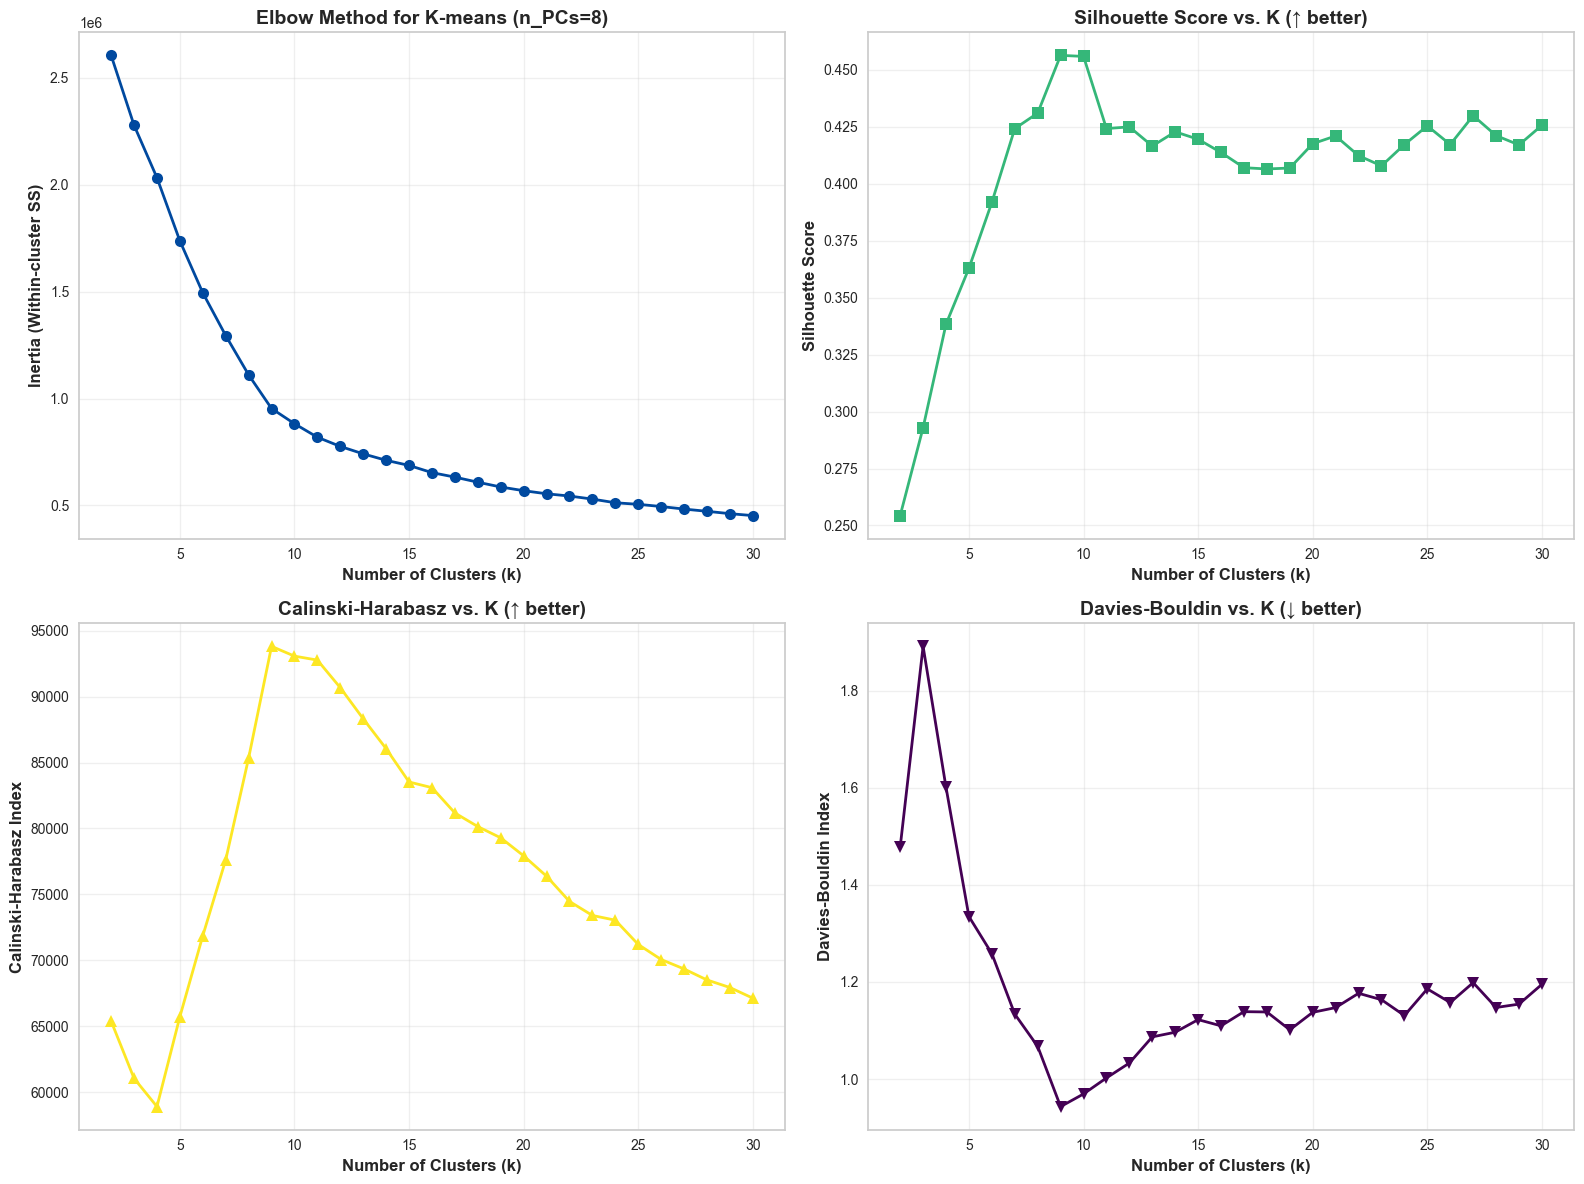


Plots saved to: \\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\09_Plots_and_figures\Plots_2025\RCN_discovery\radius_spatial_count_leiden\test_marval\kmeans_elbow_analysis_pcs8.png

RECOMMENDED K VALUES FOR K-MEANS

 Method 1: Elbow Method (2nd derivative)
   Recommended K: 9

 Method 2: Best Silhouette Score
   Recommended K: 9
   Score: 0.456

 Method 3: Best Calinski-Harabasz
   Recommended K: 9
   Score: 93812.4

 Method 4: Best Davies-Bouldin (minimum)
   Recommended K: 9
   Score: 0.943

 BEST OVERALL (Composite Score):
   Recommended K: 9
   Composite: 0.826
   Silhouette: 0.456
   CH: 93812.4
   DB: 0.943

FINAL RECOMMENDATION: Use K = 9 clusters

K-means Clustering Summary:


,K,Inertia,Silhouette_Score,Calinski_Harabasz,Davies_Bouldin,Composite_Score
0,2,2.604944e+06,0.254336,65392.034629,1.477574,0.644505
1,3,2.278215e+06,0.292919,61048.232397,1.890917,0.599069
2,4,2.032641e+06,0.338345,58905.301194,1.600688,0.624607
3,5,1.737202e+06,0.362903,65722.356628,1.334589,0.676376
4,6,1.494217e+06,0.391804,71860.285601,1.258222,0.709733
5,7,1.294365e+06,0.424186,77621.456497,1.133686,0.746578
6,8,1.110582e+06,0.430983,85343.577454,1.067214,0.781008
7,9,9.532222e+05,0.456333,93812.391955,0.943225,0.826252
8,10,8.820871e+05,0.455863,93070.204774,0.969276,0.821241
9,11,8.189215e+05,0.424203,92769.197725,1.002261,0.811987



Summary saved to: \\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\08_Results\Datasets\08_RCN\neigh_graph_matrix\test_marval\kmeans_optimization_pcs8.csv


In [25]:
# K-MEANS CLUSTERING: ELBOW METHOD AND OPTIMAL K DETERMINATION
# =====================================================================



# Use the same PCA-transformed data and number of PCs as before
n_pcs_to_use = 8  # Same as used in Leiden analysis
X_pca_subset = X_pca[:, :n_pcs_to_use]

# Define range of k values to test
k_range = range(2, 31)  # Test from 2 to 30 clusters

# Initialize lists to store metrics
inertias = []
silhouette_scores = []
calinski_scores = []
davies_bouldin_scores = []

print("=" * 70)
print("TESTING K-MEANS WITH DIFFERENT K VALUES")
print("=" * 70)

# Compute metrics for each k
for k in k_range:
    # Fit K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca_subset)
    
    # Inertia (within-cluster sum of squares)
    inertias.append(kmeans.inertia_)
    
    # Silhouette Score (higher is better)
    sil_score = silhouette_score(X_pca_subset, labels, metric='euclidean', sample_size=10000)
    silhouette_scores.append(sil_score)
    
    # Calinski-Harabasz Index (higher is better)
    ch_score = calinski_harabasz_score(X_pca_subset, labels)
    calinski_scores.append(ch_score)
    
    # Davies-Bouldin Index (lower is better)
    db_score = davies_bouldin_score(X_pca_subset, labels)
    davies_bouldin_scores.append(db_score)
    
    print(f"K={k:2d}: Inertia={kmeans.inertia_:.1f} | Silhouette={sil_score:.3f} | CH={ch_score:.1f} | DB={db_score:.3f}")

print("=" * 70)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Elbow Method (Inertia)
axes[0, 0].plot(k_range, inertias, marker='o', color='#00499F', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Inertia (Within-cluster SS)', fontsize=12, fontweight='bold')
axes[0, 0].set_title(f'Elbow Method for K-means (n_PCs={n_pcs_to_use})', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Silhouette Score
axes[0, 1].plot(k_range, silhouette_scores, marker='s', color='#35b779', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Silhouette Score vs. K (↑ better)', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Calinski-Harabasz Index
axes[1, 0].plot(k_range, calinski_scores, marker='^', color='#fde724', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Calinski-Harabasz Index', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Calinski-Harabasz vs. K (↑ better)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Davies-Bouldin Index
axes[1, 1].plot(k_range, davies_bouldin_scores, marker='v', color='#440154', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Davies-Bouldin Index', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Davies-Bouldin vs. K (↓ better)', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()

# Save plot
output_plot_kmeans = os.path.join(dir_out_plots, f"kmeans_elbow_analysis_pcs{n_pcs_to_use}.png")
#plt.savefig(output_plot_kmeans, dpi=600, bbox_inches='tight')
#plt.savefig(output_plot_kmeans.replace('.png', '.pdf'), bbox_inches='tight')
plt.show()

print(f"\nPlots saved to: {output_plot_kmeans}")

# =====================================================================
# DETERMINE OPTIMAL K
# =====================================================================

# Method 1: Elbow method using rate of decrease in inertia
inertia_diff = np.diff(inertias)
inertia_diff2 = np.diff(inertia_diff)  # Second derivative
elbow_k = np.argmax(inertia_diff2) + 3  # +3 because: +2 for k_range starting at 2, +1 for double diff

# Method 2: Best Silhouette Score
best_sil_k = list(k_range)[np.argmax(silhouette_scores)]

# Method 3: Best Calinski-Harabasz
best_ch_k = list(k_range)[np.argmax(calinski_scores)]

# Method 4: Best Davies-Bouldin (minimum)
best_db_k = list(k_range)[np.argmin(davies_bouldin_scores)]

# Normalize metrics for composite score
norm_sil = (np.array(silhouette_scores) + 1) / 2
norm_ch = np.array(calinski_scores) / max(calinski_scores)
norm_db = 1 - (np.array(davies_bouldin_scores) / (max(davies_bouldin_scores) * 2))
composite_score_kmeans = (norm_sil + norm_ch + norm_db) / 3
best_comp_k = list(k_range)[np.argmax(composite_score_kmeans)]

# Create summary DataFrame
summary_kmeans = pd.DataFrame({
    'K': list(k_range),
    'Inertia': inertias,
    'Silhouette_Score': silhouette_scores,
    'Calinski_Harabasz': calinski_scores,
    'Davies_Bouldin': davies_bouldin_scores,
    'Composite_Score': composite_score_kmeans
})

print("\n" + "=" * 70)
print("RECOMMENDED K VALUES FOR K-MEANS")
print("=" * 70)

print(f"\n Method 1: Elbow Method (2nd derivative)")
print(f"   Recommended K: {elbow_k}")

print(f"\n Method 2: Best Silhouette Score")
print(f"   Recommended K: {best_sil_k}")
print(f"   Score: {summary_kmeans.loc[summary_kmeans['K']==best_sil_k, 'Silhouette_Score'].values[0]:.3f}")

print(f"\n Method 3: Best Calinski-Harabasz")
print(f"   Recommended K: {best_ch_k}")
print(f"   Score: {summary_kmeans.loc[summary_kmeans['K']==best_ch_k, 'Calinski_Harabasz'].values[0]:.1f}")

print(f"\n Method 4: Best Davies-Bouldin (minimum)")
print(f"   Recommended K: {best_db_k}")
print(f"   Score: {summary_kmeans.loc[summary_kmeans['K']==best_db_k, 'Davies_Bouldin'].values[0]:.3f}")

print(f"\n BEST OVERALL (Composite Score):")
print(f"   Recommended K: {best_comp_k}")
print(f"   Composite: {summary_kmeans.loc[summary_kmeans['K']==best_comp_k, 'Composite_Score'].values[0]:.3f}")
print(f"   Silhouette: {summary_kmeans.loc[summary_kmeans['K']==best_comp_k, 'Silhouette_Score'].values[0]:.3f}")
print(f"   CH: {summary_kmeans.loc[summary_kmeans['K']==best_comp_k, 'Calinski_Harabasz'].values[0]:.1f}")
print(f"   DB: {summary_kmeans.loc[summary_kmeans['K']==best_comp_k, 'Davies_Bouldin'].values[0]:.3f}")

print("\n" + "=" * 70)
print(f"FINAL RECOMMENDATION: Use K = {best_comp_k} clusters")
print("=" * 70)

# Display summary table
print("\nK-means Clustering Summary:")
display(summary_kmeans)

# Save results
# summary_kmeans.to_csv(os.path.join(dir_out_calculations, f"kmeans_optimization_pcs{n_pcs_to_use}.csv"), index=False)
print(f"\nSummary saved to: {os.path.join(dir_out_calculations, f'kmeans_optimization_pcs{n_pcs_to_use}.csv')}")

## Elucidating neighborhood

In [ ]:
dna_vars = [v for v in adata_nonFA.var_names if v.startswith("Hoechst_")]
adata_nonFA.uns["DNA"] = adata_nonFA[:, dna_vars].X.copy()   # stores just the Hoechst matrix
adata_nonFA.uns["Hoechst_cycles"] = dna_vars
adata_nonFA = adata_nonFA[:, [v for v in adata_nonFA.var_names if v not in dna_vars]]

In [ ]:
marker_subset = ["TIM3", "PD-L1", "PD-1", "gH2AX", "Ki67", "SOX2","p-S6"]

adata_subset = adata[:, marker_subset].copy()
adata_FA_subset = adata_FA[:, marker_subset].copy()
adata_nonFA_subset = adata_nonFA[:,marker_subset].copy()

In [ ]:
sm.pl.cluster_plots(adata_nonFA_subset, group_by = "RCN", subsample=100000, 
                    palette='viridis', use_raw=False, size=None)

In [ ]:
sm.pl.stacked_barplot(adata_nonFA, x_axis='RCN', y_axis='gh2ax')

## Presence of functional markers in cells of each RCN

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import matplotlib.lines as mlines


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import matplotlib.lines as mlines

# ---- PARAMETERS ----
marker_col = "tim3"
rcn_col = "RCN"
group_col = "Group"
sample_col = "Sample"
positive_label = "TIM3+"     
min_cells = 20            
outname = "/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/08_Results/Datasets/05_RCN/plots/RCN_functionalization/FA/" + marker_col + "_boxplot_by_RCN"

# 1) build df
df = adata.obs[[marker_col, rcn_col, group_col, sample_col, "Condition"]].copy()
df = df.dropna()

# 2) count per Sample×RCN×Group
counts = df.groupby([sample_col, rcn_col, group_col], observed=True).size().reset_index(name="n_cells")

# 3) compute per-sample proportion TIM3+
prop = (
    df.groupby([sample_col, rcn_col, group_col], observed=True)[marker_col]
      .apply(lambda x: (x == positive_label).sum() / len(x))
      .reset_index(name="proportion")
)

# Merge n_cells y Condition
prop = prop.merge(counts, on=[sample_col, rcn_col, group_col], how="left")
sample_condition = df.drop_duplicates(subset=[sample_col])[[sample_col, "Condition"]]
prop = prop.merge(sample_condition, on=sample_col, how="left")

if min_cells is not None:
    prop = prop[prop["n_cells"] >= min_cells].copy()

# ---- Forzar orden de RCN 1-18 ----
prop[rcn_col] = prop[rcn_col].astype(int)
prop[rcn_col] = pd.Categorical(prop[rcn_col], categories=range(1,19), ordered=True)
rcns = list(prop[rcn_col].cat.categories)  # asegura que rcns va de 1 a 18

# 4) detect groups
group_order = ["Non FA", "FA"]
group0, group1 = group_order

# 5) stats
pvals, stars = [], []
for rcn in rcns:
    arr0 = prop[(prop[rcn_col] == rcn) & (prop[group_col] == group0)]['proportion'].values
    arr1 = prop[(prop[rcn_col] == rcn) & (prop[group_col] == group1)]['proportion'].values
    if len(arr0) >= 2 and len(arr1) >= 2:
        stat, p = mannwhitneyu(arr0, arr1, alternative="two-sided")
    else:
        p = np.nan
    pvals.append(p)
    if np.isnan(p):
        s = ""
    elif p < 0.001:
        s = "***"
    elif p < 0.01:
        s = "**"
    elif p < 0.22:
        s = "*"
    else:
        s = ""
    stars.append(s)

stats_df = pd.DataFrame({"RCN": rcns, "pval": pvals, "sig": stars})
print(stats_df)

# 6) plot
sns.set(style="whitegrid")
plt.figure(figsize=(max(10, len(rcns)*0.9), 7))
box_palette = {"Non FA": "#1f77b4", "FA": "#d62728"}

# Boxplot
ax = sns.boxplot(
    data=prop,
    x=rcn_col,
    y="proportion",
    hue=group_col,
    hue_order=group_order,
    order=rcns,          # asegura que boxplots sigan 1-18
    showfliers=False,
    palette=box_palette
)

# Stripplot: puntos individuales con forma según Condition y color según Group
markers = {"HN": "D", "AG": "o"}  # rombo y círculo
for cond, marker in markers.items():
    subset = prop[prop["Condition"] == cond]
    sns.stripplot(
        data=subset,
        x=rcn_col,
        y="proportion",
        hue=subset[group_col],
        hue_order=group_order,
        dodge=True,
        jitter=True,
        alpha=0.9,
        size=5,
        marker=marker,
        edgecolor="black",
        linewidth=0.5,
        ax=ax,
        palette=box_palette
    )

# Limpiar leyenda duplicada
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="Group", fontsize=14)

# Annotate significancia
for i, rcn in enumerate(rcns):
    y_max = prop[prop[rcn_col] == rcn]['proportion'].max()
    y_bar = y_max + 0.1  # un poco arriba del máximo
    ax.text(
        i, y_bar, stars[i],
        ha="center", va="bottom",
        fontsize=20, color="black", fontweight="bold"
    )

ax.set_ylim(0, 1.15)
ax.set_ylabel("Proportion " + positive_label + " (per sample)", fontsize=12)
ax.set_xlabel("RCN", fontsize=14, fontweight="bold")
plt.title(positive_label + f" proportions per RCN ({group0} vs {group1})", fontsize=16, fontweight="bold")
plt.tight_layout()

# Leyenda personalizada para Condition
legend_elements = [
    mlines.Line2D([], [], color='black', marker='D', linestyle='None', markersize=6, label='HN'),
    mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=6, label='AG')
]
ax.legend(handles[:2] + legend_elements, labels[:2] + ["HN", "AG"], title="Group / Condition")

# Guardar
plt.savefig(outname + ".pdf")
plt.savefig(outname + ".png", dpi=300)
plt.show()


In [ ]:

# ---- PARAMETERS ----
marker_col = "ki67"
rcn_col = "RCN"
bmt_col = "BMT"  # <- usamos BMT
sample_col = "Sample"
positive_label = "Ki67+"     
min_cells = 20            
outname = "/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/08_Results/Datasets/05_RCN/plots/RCN_functionalization/BMT/" + marker_col + "_boxplot_by_RCN"

# 1) build df
df = adata.obs[[marker_col, rcn_col, bmt_col, sample_col, "Condition"]].copy()
df = df.dropna()

# 2) count per Sample×RCN×BMT
counts = df.groupby([sample_col, rcn_col, bmt_col]).size().reset_index(name="n_cells")

# 3) compute per-sample proportion positive
prop = (
    df.groupby([sample_col, rcn_col, bmt_col])[marker_col]
      .apply(lambda x: (x == positive_label).sum() / len(x))
      .reset_index(name="proportion")
)
# Merge n_cells y Condition
prop = prop.merge(counts, on=[sample_col, rcn_col, bmt_col], how="left")
sample_condition = df.drop_duplicates(subset=[sample_col])[[sample_col, "Condition"]]
prop = prop.merge(sample_condition, on=sample_col, how="left")

if min_cells is not None:
    prop = prop[prop["n_cells"] >= min_cells].copy()

# 4) detect groups
groups = sorted(prop[bmt_col].unique())
if len(groups) < 2:
    raise RuntimeError("Need at least 2 groups")
if len(groups) > 2:
    print("Warning: more than 2 groups found:", groups, " — using first two")
group0, group1 = groups[:2]

# 5) stats
rcns = sorted(prop[rcn_col].unique())
pvals, stars = [], []
for rcn in rcns:
    arr0 = prop[(prop[rcn_col] == rcn) & (prop[bmt_col] == group0)]['proportion'].values
    arr1 = prop[(prop[rcn_col] == rcn) & (prop[bmt_col] == group1)]['proportion'].values
    if len(arr0) >= 2 and len(arr1) >= 2:
        stat, p = mannwhitneyu(arr0, arr1, alternative="two-sided")
    else:
        p = np.nan
    pvals.append(p)
    if np.isnan(p):
        s = ""
    elif p < 0.001:
        s = "***"
    elif p < 0.01:
        s = "**"
    elif p < 0.05:
        s = "*"
    else:
        s = ""
    stars.append(s)

stats_df = pd.DataFrame({"RCN": rcns, "pval": pvals, "sig": stars})
print(stats_df)

# 6) plot
sns.set(style="whitegrid")
plt.figure(figsize=(max(10, len(rcns)*0.9), 7))
box_palette = {"No": "#2ca02c", "Yes": "#ff69b4"}  # nueva paleta

# Boxplot
ax = sns.boxplot(
    data=prop,
    x=rcn_col,
    y="proportion",
    hue=bmt_col,
    showfliers=False,
    palette=box_palette
)

# Stripplot: puntos individuales con forma según Condition y color según BMT
markers = {"HN": "D", "AG": "o"}  # rombo y círculo

for cond, marker in markers.items():
    subset = prop[prop["Condition"] == cond]
    sns.stripplot(
        data=subset,
        x=rcn_col,
        y="proportion",
        hue=subset[bmt_col],  # color según BMT
        dodge=True,
        jitter=True,
        alpha=0.9,
        size=5,
        marker=marker,
        edgecolor="black",
        linewidth=0.5,
        ax=ax,
        palette=box_palette
    )

# Limpiar leyenda duplicada
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="BMT")

# Annotate significancia
for i, rcn in enumerate(rcns):
    y_max = prop[prop[rcn_col] == rcn]['proportion'].max()
    y_bar = y_max + 0.1
    ax.text(
        i, y_bar, stars[i],
        ha="center", va="bottom",
        fontsize=20, color="black", fontweight="bold"
    )

ax.set_ylim(0, 1.15)
ax.set_ylabel("Proportion " + positive_label + " (per sample)")
ax.set_xlabel("RCN")
plt.title(positive_label + f" proportions per RCN (No vs Yes BMT)")
plt.tight_layout()

# Leyenda personalizada para Condition
import matplotlib.lines as mlines
legend_elements = [
    mlines.Line2D([], [], color='black', marker='D', linestyle='None', markersize=6, label='HN'),
    mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=6, label='AG')
]
ax.legend(handles[:2] + legend_elements, labels[:2] + ["HN", "AG"], title="BMT / Condition")

# Guardar
plt.savefig(outname + ".pdf")
plt.savefig(outname + ".png", dpi=300)
plt.show()


## Identifying spatial organization of cells using LDA

In [ ]:
#For lda
adata = sm.tl.spatial_lda(adata, x_coordinate='X_centroid', y_coordinate='Y_centroid',
                            phenotype='phenotype', method="radius", radius=radius,
                            subset=None, label='spatial_lda_count')

In [ ]:
adata = sm.tl.spatial_cluster(adata, k=10, method = 'kmeans', df_name='spatial_count', random_state=42,
                              label='spatial__lda_count')

In [ ]:
sm.hl.scimap_to_csv(adata, data_type='scaled', output_dir = dir_out_data, 
                    file_name= sample_num[n], CellID='CellID')

## Identify neighborhoods of expression

In [ ]:
sm.tl.spatial_expression(adata, x_coordinate='X_centroid', y_coordinate='Y_centroid', z_coordinate=None, method='knn',knn=30, imageid='imageid', 
                         use_raw=True, log=False, subset=None, label='spatial_expression', verbose=True)

In [ ]:
adata = sm.tl.spatial_cluster(adata, k=10, method = 'kmeans', df_name='spatial_expression', random_state=42,
                              label='spatial_expression_cluster')

In [ ]:
sm.pl.stacked_barplot(adata, x_axis='spatial_expression_cluster', y_axis='ROIs')

In [ ]:
sm.pl.stacked_barplot(adata, x_axis='ROIs', y_axis='spatial_expression_cluster')

## Identify phenotipically similar cellular aggregates

In [ ]:
sm.tl.spatial_aggregate(adata, x_coordinate='X_centroid', y_coordinate='Y_centroid', z_coordinate=None,
                      purity=60, phenotype='phenotype', method='knn',
                        knn=30, imageid='imageid', subset=None, verbose=False, label='spatial_aggregate')

In [ ]:
sm.pl.stacked_barplot(adata, x_axis='spatial_aggregate', y_axis='Patient')

## Cellular distance

In [ ]:
sm.tl.spatial_pscore(adata, proximity = ["dendritic cells", "CD4+ T cells"], 
                     score_by='Patient', x_coordinate='X_centroid', y_coordinate='Y_centroid',z_coordinate=None, 
                     phenotype='phenotype', method='knn', knn=30, imageid='imageid', subset=None, verbose=True, label='spatial_pscore')

In [ ]:
sm.pl.spatial_pscore(adata, label='spatial_pscore', plot_score='both', order_xaxis=None, color='yellow', figsize=None)